## Preprocessing Data - Cryptocurrency dan Stock Price

In [1]:
# lib manipulasi data
import pandas as pd
import numpy as np

# lib untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# lib praproses data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

1. Data Collections

In [2]:
# load dataset
dataset = pd.read_csv("../dataset/Cryptocurrency-BTC-USD-2024-05.csv", parse_dates=['Date'])
dataset = dataset.set_index("Date")

In [3]:
# show metadataset
print(np.round(
  dataset[["Open","High","Low","Close"]].describe(),0
))

          Open     High      Low    Close
count   3439.0   3439.0   3439.0   3439.0
mean   16939.0  17333.0  16520.0  16958.0
std    18329.0  18761.0  17855.0  18345.0
min      177.0    212.0    172.0    178.0
25%     1724.0   1787.0   1656.0   1729.0
50%     9146.0   9300.0   8956.0   9159.0
75%    27807.0  28361.0  27268.0  27872.0
max    73079.0  73750.0  71334.0  73084.0


In [4]:
# round .3f
dataset = np.round(dataset[["Open","High","Low","Close"]],4)

In [5]:
# show dataset
print(dataset)

                  Open        High         Low       Close
Date                                                      
2015-01-01    320.4350    320.4350    314.0030    314.2490
2015-01-02    314.0790    315.8390    313.5650    315.0320
2015-01-03    314.8460    315.1500    281.0820    281.0820
2015-01-04    281.1460    287.2300    257.6120    264.1950
2015-01-05    265.0840    278.3410    265.0840    274.4740
...                ...         ...         ...         ...
2024-05-27  68512.1797  70597.8828  68232.5000  69394.5547
2024-05-28  69392.1953  69514.6406  67227.1562  68296.2188
2024-05-29  68296.3516  68852.4609  67101.4922  67578.0938
2024-05-30  67576.0859  69500.5391  67118.0781  68364.9922
2024-05-31  68362.5156  68999.5625  66633.4219  67491.4141

[3439 rows x 4 columns]


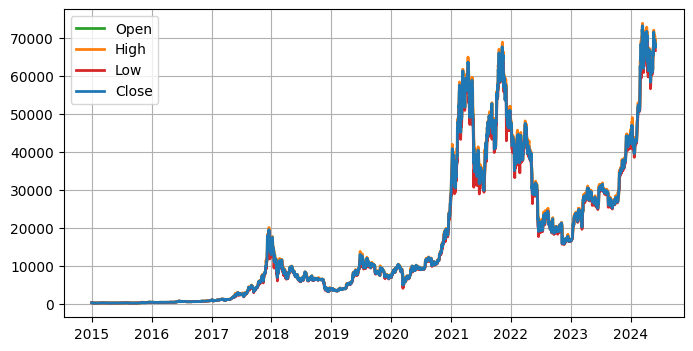

In [6]:
# create frame
fig, ax = plt.subplots(figsize = (8,4))

# time series plot
ax.plot(dataset.index.values, dataset["Open"], color="tab:green", label="Open", linewidth=2)
ax.plot(dataset.index.values, dataset["High"], color="tab:orange", label="High", linewidth=2)
ax.plot(dataset.index.values, dataset["Low"], color="tab:red", label="Low", linewidth=2)
ax.plot(dataset.index.values, dataset["Close"], color="tab:blue", label="Close", linewidth=2)

# set label-labels
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc="best")
ax.grid(True)

plt.show()

2. Data Preprocessing

In [7]:
# # choose features
# data = dataset.filter(['Close'])

In [8]:
# convert dataframe to series close price
data = dataset.values
np.round(data[:3],7)

array([[320.435, 320.435, 314.003, 314.249],
       [314.079, 315.839, 313.565, 315.032],
       [314.846, 315.15 , 281.082, 281.082]])

In [9]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [10]:
# show normalize data
scaled_data[:3]

array([[0.0019689 , 0.00147819, 0.00200236, 0.00186743],
       [0.00188172, 0.0014157 , 0.0019962 , 0.00187817],
       [0.00189224, 0.00140633, 0.00153974, 0.0014125 ]])

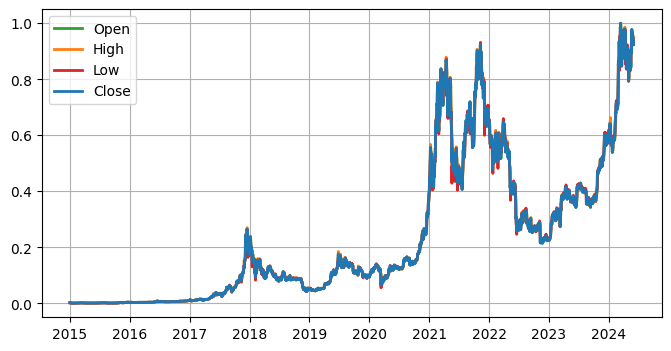

In [11]:
# create frame
fig, ax = plt.subplots(figsize = (8,4))

# time series plot
ax.plot(dataset.index, scaled_data[:,0:1], color="tab:green", label="Open", linewidth=2)
ax.plot(dataset.index, scaled_data[:,1:2], color="tab:orange", label="High", linewidth=2)
ax.plot(dataset.index, scaled_data[:,2:3], color="tab:red", label="Low", linewidth=2)
ax.plot(dataset.index, scaled_data[:,3:4], color="tab:blue", label="Close", linewidth=2)

# set label-labels
ax.set_title("",fontsize=14)
ax.set_xlabel("",fontsize=12)
ax.set_ylabel("",fontsize=12)
ax.legend(loc="best")
ax.grid(True)
plt.show()

3. Results of Preprocessing

In [12]:
# results preprocessing of normalize data
df_normalized = pd.concat([
  pd.DataFrame(dataset.index.values, columns=["Date"]),
  pd.DataFrame(scaled_data, columns=["Open", "High", "Low", "Close"]),
], axis=1)

In [13]:
# show normalize
print(df_normalized)

           Date      Open      High       Low     Close
0    2015-01-01  0.001969  0.001478  0.002002  0.001867
1    2015-01-02  0.001882  0.001416  0.001996  0.001878
2    2015-01-03  0.001892  0.001406  0.001540  0.001413
3    2015-01-04  0.001430  0.001027  0.001210  0.001181
4    2015-01-05  0.001210  0.000906  0.001315  0.001322
...         ...       ...       ...       ...       ...
3434 2024-05-27  0.937352  0.957135  0.956415  0.949401
3435 2024-05-28  0.949423  0.942405  0.942288  0.934336
3436 2024-05-29  0.934391  0.933401  0.940522  0.924486
3437 2024-05-30  0.924512  0.942213  0.940755  0.935279
3438 2024-05-31  0.935299  0.935401  0.933945  0.923297

[3439 rows x 5 columns]


4. Splitting Data

In [14]:
# split data train and test
train_data, test_data = train_test_split(df_normalized, train_size=0.80, test_size=0.20, shuffle=False)

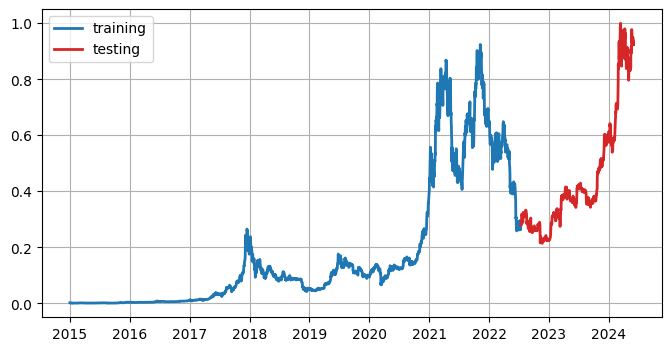

In [15]:
# create figure
fig, ax = plt.subplots(figsize = (8,4))

# create time series plot
ax.plot(
  df_normalized["Date"].iloc[0:len(train_data)], train_data["Close"], 
  color="tab:blue", label="training", linewidth=2
)
ax.plot(
  df_normalized["Date"].iloc[len(train_data):], test_data["Close"],
  color="tab:red", label="testing", linewidth=2
)

# set labels
ax.set_title("",fontsize=14)
ax.set_xlabel("",fontsize=12)
ax.set_ylabel("",fontsize=12)
ax.legend(loc="best")
ax.grid(True)

# show plot
plt.show()

In [16]:
train_data

,Date,Open,High,Low,Close
0,2015-01-01,0.001969,0.001478,0.002002,0.001867
1,2015-01-02,0.001882,0.001416,0.001996,0.001878
2,2015-01-03,0.001892,0.001406,0.001540,0.001413
3,2015-01-04,0.001430,0.001027,0.001210,0.001181
4,2015-01-05,0.001210,0.000906,0.001315,0.001322
...,...,...,...,...,...
2746,2022-07-09,0.295462,0.294614,0.298956,0.293725
2747,2022-07-10,0.293737,0.290724,0.288854,0.283687
2748,2022-07-11,0.283659,0.280733,0.277576,0.271481
2749,2022-07-12,0.271508,0.269679,0.268920,0.262612


In [21]:
test_data

,Date,Open,High,Low,Close
2751,2022-07-14,0.274813,0.279829,0.274270,0.279702
2752,2022-07-15,0.279775,0.284566,0.284215,0.283357
2753,2022-07-16,0.283354,0.289681,0.285928,0.288212
2754,2022-07-17,0.288305,0.290854,0.289572,0.282575
2755,2022-07-18,0.282638,0.304893,0.289624,0.305980
...,...,...,...,...,...
3434,2024-05-27,0.937352,0.957135,0.956415,0.949401
3435,2024-05-28,0.949423,0.942405,0.942288,0.934336
3436,2024-05-29,0.934391,0.933401,0.940522,0.924486
3437,2024-05-30,0.924512,0.942213,0.940755,0.935279


In [27]:
# load dataset
dataset = pd.read_csv("../dataset/Cryptocurrency-BTC-USD-2024-05.csv", parse_dates=['Date'])


In [36]:
dataset.iloc[0:len(train_data),0:1]

,Date
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05
...,...
2746,2022-07-09
2747,2022-07-10
2748,2022-07-11
2749,2022-07-12
